# Running gemma2 on local

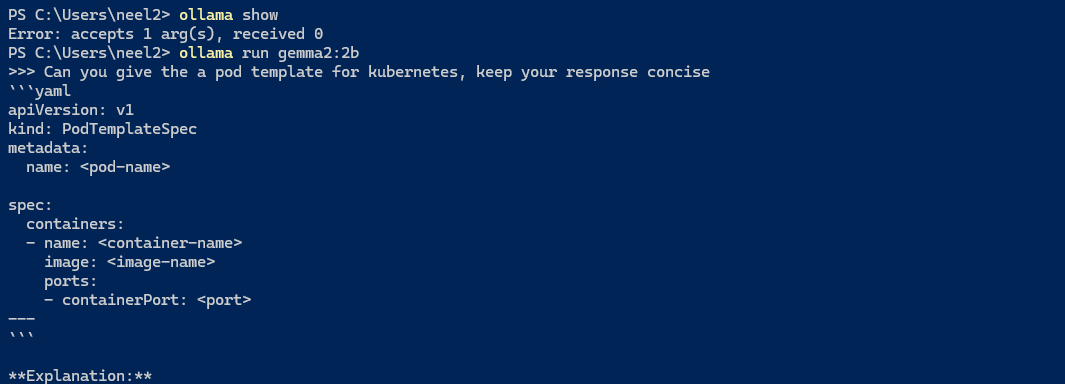

# API Based Ollama

In [1]:
import requests
import json

# URL of the API
url = "http://localhost:11434/api/chat"

# JSON data to send in the POST request
data = {
    "model": "gemma2:2b",
    "messages": [
        { "role": "user", "content": "why is the sky blue?" }
    ]
}

# Send the POST request
response = requests.post(url, json=data,stream=False)

# Print the response from the server
print(response.status_code)



200


In [2]:
response.content.decode("utf-8")

'{"model":"gemma2:2b","created_at":"2024-09-14T21:22:09.2568458Z","message":{"role":"assistant","content":"The"},"done":false}\n{"model":"gemma2:2b","created_at":"2024-09-14T21:22:09.3220427Z","message":{"role":"assistant","content":" sky"},"done":false}\n{"model":"gemma2:2b","created_at":"2024-09-14T21:22:09.3894026Z","message":{"role":"assistant","content":" looks"},"done":false}\n{"model":"gemma2:2b","created_at":"2024-09-14T21:22:09.4537114Z","message":{"role":"assistant","content":" blue"},"done":false}\n{"model":"gemma2:2b","created_at":"2024-09-14T21:22:09.5179627Z","message":{"role":"assistant","content":" because"},"done":false}\n{"model":"gemma2:2b","created_at":"2024-09-14T21:22:09.5837908Z","message":{"role":"assistant","content":" of"},"done":false}\n{"model":"gemma2:2b","created_at":"2024-09-14T21:22:09.6479903Z","message":{"role":"assistant","content":" a"},"done":false}\n{"model":"gemma2:2b","created_at":"2024-09-14T21:22:09.7112235Z","message":{"role":"assistant","cont

In [3]:
def combine_response(response):
    combined_content = ""
    for line in response.content.decode("utf-8").split("\n"):
        if line.strip():  # Check if the line is not empty
            tmp = json.loads(line)
            if 'message' in tmp and isinstance(tmp['message'], dict):
                message = tmp['message']
                if message.get('role') == 'assistant' and 'content' in message:
                    combined_content += message['content']
    return combined_content.strip()

In [4]:
ans = combine_response(response)

In [5]:
print(ans)

The sky looks blue because of a phenomenon called **Rayleigh scattering**. Here's a simplified explanation:

1. **Sunlight:** Sunlight contains all the colors of the rainbow. When it enters Earth's atmosphere, it collides with tiny particles like nitrogen and oxygen molecules. 

2. **Scattering:** This is where the magic happens.  Blue light (having shorter wavelengths) gets scattered more than other colors by these air molecules. Imagine hitting a wall made of bouncy balls; you'll see the lighter-colored ones bouncing off more easily than the heavier ones, right? That's similar to how sunlight scatters with our atmosphere! 

3. **Blue Sky:**  This scattered blue light travels in all directions and reaches our eyes from everywhere in the sky. 

**Why not violet?**
Violet light actually has an even shorter wavelength than blue. However, the Earth's atmosphere is more efficient at scattering the blue light than violet. This means we primarily see a sky that appears blue.


**Interesting 

In [58]:
!ollama list

NAME     	ID          	SIZE  	MODIFIED    
gemma2:2b	8ccf136fdd52	1.6 GB	2 hours ago	


# Multi Modal

## With Image

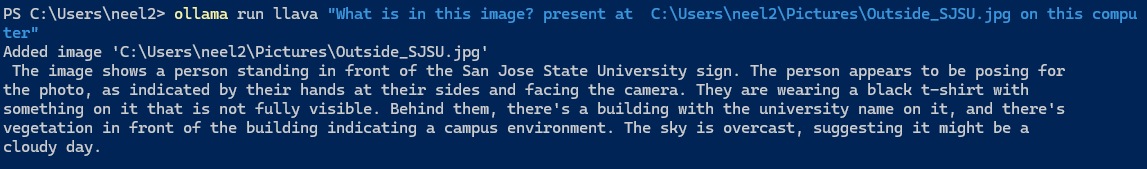

## With File

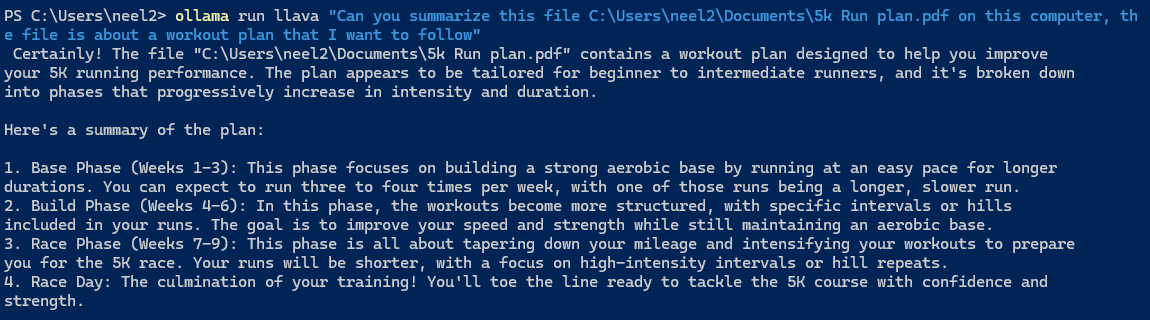